In [1]:
# Import necessary libraries to check and compare number of columns vs rank of dataset
import pandas as pd
import numpy as np

# Load the dataset
Ames = pd.read_csv("Ames.csv")

# Select numerical columns without missing values
numerical_data = Ames.select_dtypes(include=[np.number]).dropna(axis=1)

# Calculate the matrix rank
rank = np.linalg.matrix_rank(numerical_data.values)

# Number of features
num_features = numerical_data.shape[1]

# Print the rank and the number of features
print(f"Numerical features without missing values: {num_features}")
print(f"Rank: {rank}")

Numerical features without missing values: 27
Rank: 26


In [1]:
# Creating and using a function to identify redundant features in a dataset
import pandas as pd
import numpy as np

def find_redundant_features(data):
    """
    Identifies and returns redundant features in a dataset based on matrix rank.
    A feature is considered redundant if removing it does not decrease the rank of the
    dataset, indicating that it can be expressed as a linear combination of other
    features.
    
    Parameters:
    data (DataFrame): The numerical dataset to analyze.
    
    Returns:
    list: A list of redundant feature names.
    """
    # Calculate the matrix rank of the original dataset
    original_rank = np.linalg.matrix_rank(data)
    redundant_features = []
    for column in data.columns:
        # Create a new dataset without this column
        temp_data = data.drop(column, axis=1)
        # Calculate the rank of the new dataset
        temp_rank = np.linalg.matrix_rank(temp_data)
        # If the rank does not decrease, the removed column is redundant
        if temp_rank == original_rank:
            redundant_features.append(column)
    return redundant_features

# Usage of the function with the numerical data
Ames = pd.read_csv("Ames.csv")
numerical_data = Ames.select_dtypes(include=[np.number]).dropna(axis=1)
redundant_features = find_redundant_features(numerical_data)
print("Redundant features:", redundant_features)

Redundant features: ['GrLivArea', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF']


In [3]:
#import pandas
import pandas as pd

# Load the dataset
Ames = pd.read_csv("Ames.csv")

# Calculate the sum of "1stFlrSF", "2ndFlrSF", and "LowQualFinSF"
Ames["CalculatedGrLivArea"] = Ames["1stFlrSF"] + Ames["2ndFlrSF"] + Ames["LowQualFinSF"]

# Compare the calculated sum with the existing "GrLivArea" column
Ames["IsEqual"] = Ames["GrLivArea"] == Ames["CalculatedGrLivArea"]

# Output the percentage of rows where the values match
match_percentage = Ames["IsEqual"].mean() * 100
print(f"Percentage of rows where GrLivArea equals the sum of the other three features: "
      f"{int(match_percentage)}%")

Percentage of rows where GrLivArea equals the sum of the other three features: 100%


C:\Users\RSSpe\AppData\Local\Temp\ipykernel_11204\3444311805.py:40: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(np.array(coefficients), labels=features)


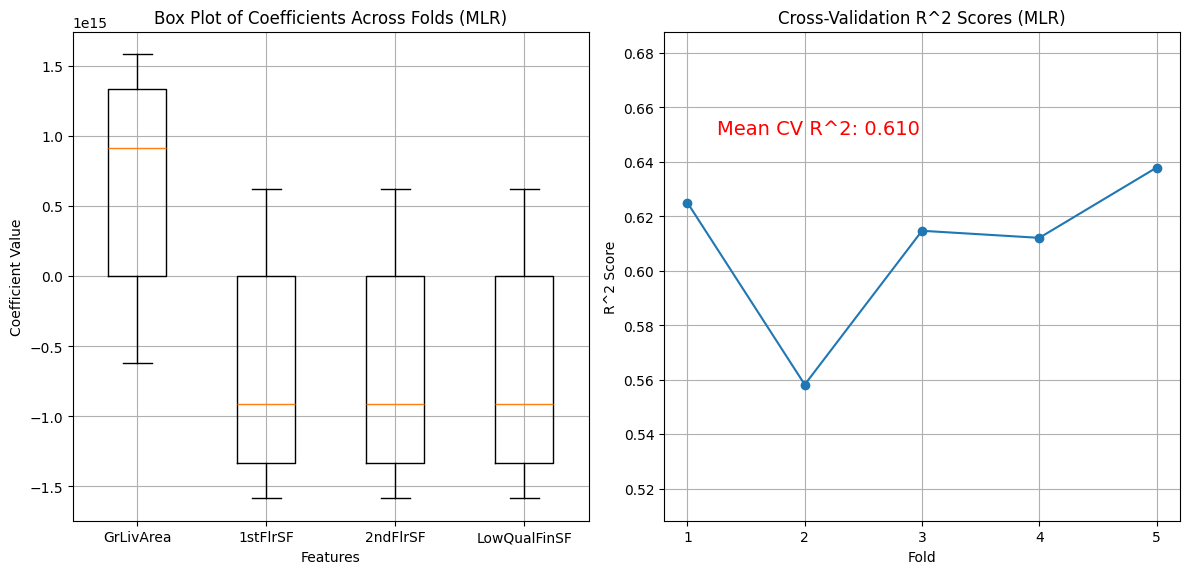

In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Load the data
Ames = pd.read_csv("Ames.csv")
features = ["GrLivArea", "1stFlrSF", "2ndFlrSF", "LowQualFinSF"]
X = Ames[features]
y = Ames["SalePrice"]

# Initialize a K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Collect coefficients and CV scores
coefficients = []
cv_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and fit the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    coefficients.append(model.coef_)
    
    # Calculate R^2 score using the model's score method
    score = model.score(X_test, y_test)
    # print(score)
    cv_scores.append(score)

# Plotting the coefficients
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.boxplot(np.array(coefficients), labels=features)
plt.title("Box Plot of Coefficients Across Folds (MLR)")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.grid(True)

# Plotting the CV scores
# Annotate mean R^2 score
plt.subplot(1, 2, 2)
plt.plot(range(1, 6), cv_scores, marker="o", linestyle="-")  # Make x-axis start from 1
plt.title("Cross-Validation R^2 Scores (MLR)")
plt.xlabel("Fold")
plt.xticks(range(1, 6))  # Set x-ticks to match fold numbers
plt.ylabel("R^2 Score")
plt.ylim(min(cv_scores) - 0.05, max(cv_scores) + 0.05)  # Dynamically adjust y-axis limits
plt.grid(True)
mean_r2 = np.mean(cv_scores)
plt.annotate(f"Mean CV R^2: {mean_r2:.3f}", xy=(1.25, 0.65), color="red", fontsize=14)

plt.tight_layout()
plt.show()

C:\Users\RSSpe\AppData\Local\Temp\ipykernel_11204\3038637839.py:52: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i, 0].boxplot(np.array(coefficients), labels=features)
C:\Users\RSSpe\AppData\Local\Temp\ipykernel_11204\3038637839.py:52: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i, 0].boxplot(np.array(coefficients), labels=features)


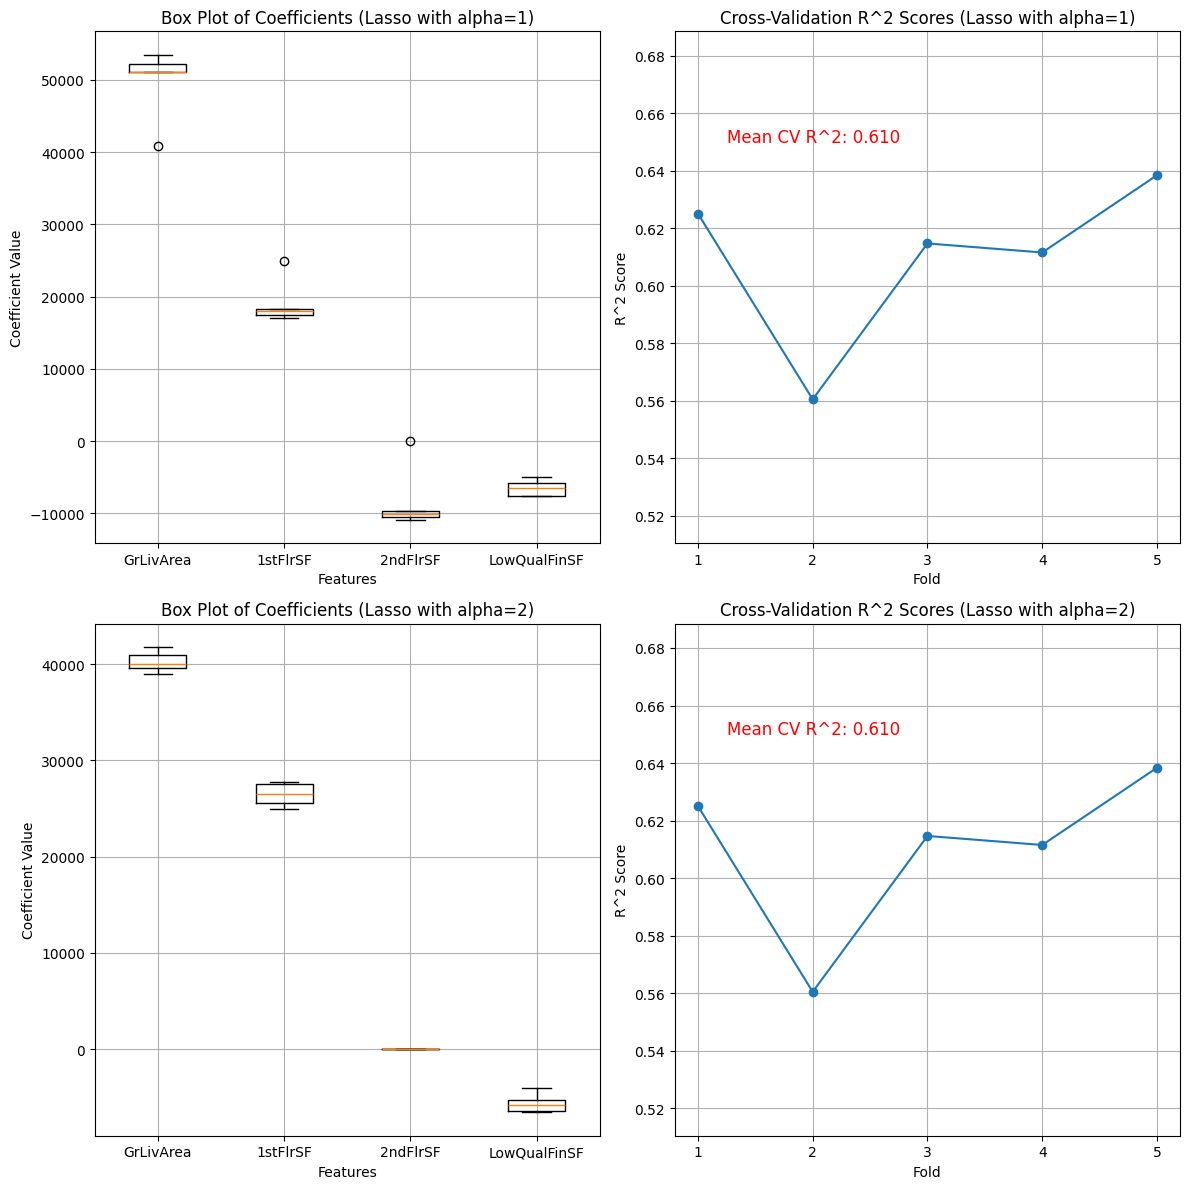

In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Load the data
Ames = pd.read_csv("Ames.csv")
features = ["GrLivArea", "1stFlrSF", "2ndFlrSF", "LowQualFinSF"]
X = Ames[features]
y = Ames["SalePrice"]

# Initialize a k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Prepare to collect results
results = {}

for alpha in [1, 2]:  # Loop through both alpha values
    coefficients = []
    cv_scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Scale features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Initialize and fit the Lasso regression model
        lasso_model = Lasso(alpha=alpha, max_iter=20000)
        lasso_model.fit(X_train_scaled, y_train)
        coefficients.append(lasso_model.coef_)

        # Calculate R^2 score using the model's score method
        score = lasso_model.score(X_test_scaled, y_test)
        cv_scores.append(score)

    results[alpha] = (coefficients, cv_scores)

# Plotting the results
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
alphas = [1, 2]

for i, alpha in enumerate(alphas):
    coefficients, cv_scores = results[alpha]

    # Plotting the coefficients
    axes[i, 0].boxplot(np.array(coefficients), labels=features)
    axes[i, 0].set_title(f"Box Plot of Coefficients (Lasso with alpha={alpha})")
    axes[i, 0].set_xlabel("Features")
    axes[i, 0].set_ylabel("Coefficient Value")
    axes[i, 0].grid(True)

    # Plotting the CV scores
    axes[i, 1].plot(range(1, 6), cv_scores, marker="o", linestyle="-")
    axes[i, 1].set_title(f"Cross-Validation R^2 Scores (Lasso with alpha={alpha})")
    axes[i, 1].set_xlabel("Fold")
    axes[i, 1].set_xticks(range(1, 6))
    axes[i, 1].set_ylabel("R^2 Score")
    axes[i, 1].set_ylim(min(cv_scores) - 0.05, max(cv_scores) + 0.05)
    axes[i, 1].grid(True)

    mean_r2 = np.mean(cv_scores)
    axes[i, 1].annotate(f"Mean CV R^2: {mean_r2:.3f}", xy=(1.25, 0.65),
                        color="red", fontsize=12)

plt.tight_layout()
plt.show()


C:\Users\RSSpe\AppData\Local\Temp\ipykernel_11204\2104169997.py:39: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(np.array(coefficients), labels=features)


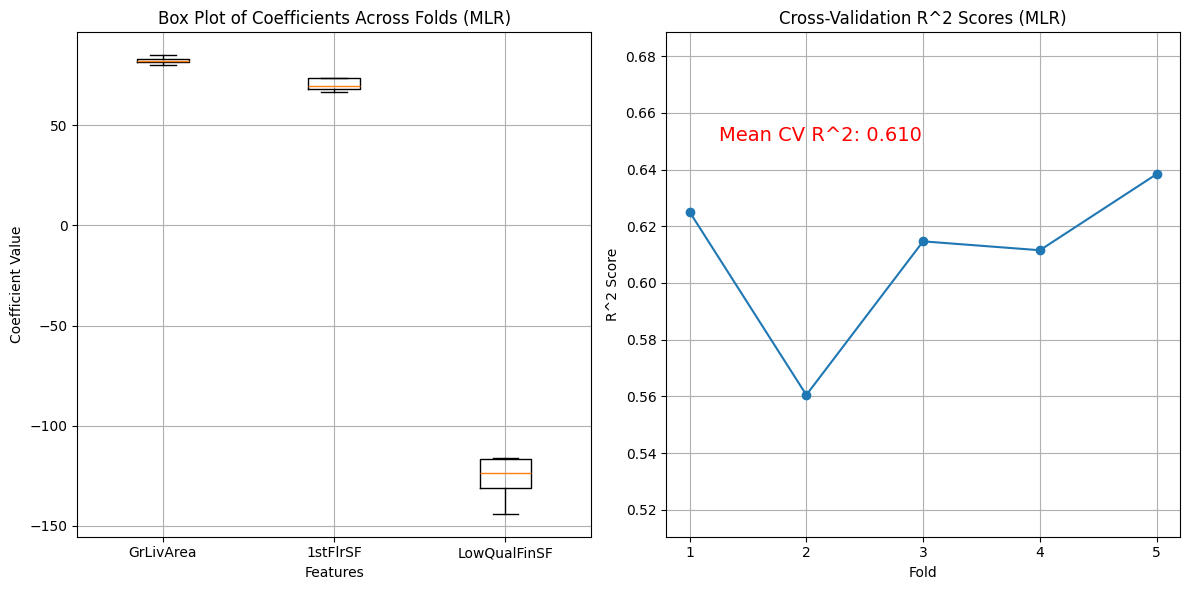

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

# Load the data
Ames = pd.read_csv('Ames.csv')
features = ['GrLivArea', '1stFlrSF', 'LowQualFinSF']  # Remove '2ndFlrSF' after Lasso
X = Ames[features]
y = Ames['SalePrice']

# Initialize a K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Collect coefficients and CV scores
coefficients = []
cv_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and fit the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    coefficients.append(model.coef_)

    # Calculate R^2 score using the model's score method
    score = model.score(X_test, y_test)
    # print(score)
    cv_scores.append(score)

# Plotting the coefficients
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.boxplot(np.array(coefficients), labels=features)
plt.title('Box Plot of Coefficients Across Folds (MLR)')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.grid(True)

# Plotting the CV scores
plt.subplot(1, 2, 2)
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='-')  # make x-axis start from 1
plt.title('Cross-Validation R^2 Scores (MLR)')
plt.xlabel('Fold')
plt.xticks(range(1, 6))  # Set x-ticks to match fold numbers
plt.ylabel('R^2 Score')
plt.ylim(min(cv_scores) - 0.05, max(cv_scores) + 0.05)  # Dynamically adjust y-axis limits
plt.grid(True)

# Annotate mean R^2 score
mean_r2 = np.mean(cv_scores)
plt.annotate(f'Mean CV R^2: {mean_r2:.3f}', xy=(1.25, 0.65), color='red', fontsize=14)

plt.tight_layout()
plt.show()

> **Nota sobre Lasso y multicolinealidad:**  
>  
> - Si tienes multicolinealidad fuerte, Lasso puede ayudar a:  
>   - Identificar variables redundantes.  
>   - Reducir el número de variables manteniendo buen desempeño predictivo.  
>   - Mejorar la estabilidad y la interpretabilidad del modelo.  
>  
> - Si solo buscas identificar colinealidad, existen otras técnicas específicas, como:  
>   - Análisis de correlación.  
>   - Matriz de varianza inflada (VIF).  
>   - Análisis del rango de la matriz.  
>  
> - Lasso es una herramienta para regularización y selección de variables, que también ayuda a manejar colinealidad, pero no es exclusivamente un detector de colinealidad.  
>  
> - Además, **Lasso puede ser usado como modelo final**, no solo como herramienta para detectar variables redundantes o colinealidad. Ofrece un modelo más robusto y simple, con buena capacidad predictiva.